In [1]:
%matplotlib notebook

In [9]:
import cartopy.crs as ccrs
import numpy as np
import matplotlib.pyplot as plt

## Define image projection and parameters

In [26]:
src_proj = {'pixel_width': 25000,
            'pixel_height': 25000,
            'ccrs': {'central_latitude': 90.0,
                     'central_longitude': -45.0,
                     'false_easting': 0.0,
                     'false_northing': 0.0,
                     'true_scale_latitude': 70 },
            'bounds': [-3850000.000, 3750000., -5350000., 5850000.000]}
src_globe = ccrs.Globe(datum=None, semimajor_axis=6378273., semiminor_axis=6356889.449)

src_crs = ccrs.Stereographic(**src_proj['ccrs'], globe=src_globe)

## Define output projection and parameters

In [30]:
dst_proj = {'pixel_width': 50135.05,
            'pixel_height': 50135.05,
            'ccrs': {'central_latitude': 90.,
                     'central_longitude': 0.,
                     'false_easting': 0.0,
                     'false_northing': 0.0},
            'bounds': [-8999241.475, 8999241.475, -8999241.475, 8999241.475]}
dst_globe = ccrs.Globe(datum=None, semimajor_axis=6371228, semiminor_axis=6371228)
dst_crs = ccrs.LambertAzimuthalEqualArea(**dst_proj['ccrs'], globe=dst_globe)

In [13]:
def read_seaice_mask(file=r'C:\Users\apbarret\Documents\data\sea_ice_index\Arctic_region_mask_Meier_AnnGlaciol2007.msk'):
    """Reads sea ice mask"""
    cols = 304
    rows = 448
    img = np.fromfile(file, dtype='byte').reshape(rows, cols)
    return img

In [14]:
mask = read_seaice_mask()

<IPython.core.display.Javascript object>


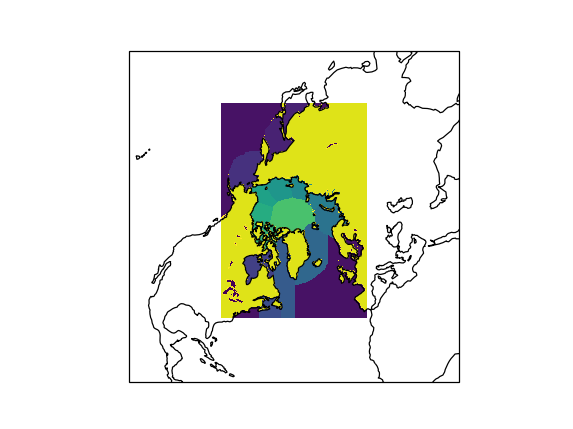

In [28]:
ax = plt.subplot(projection=src_crs)
ax.set_extent([0., 359., 20., 90.], ccrs.PlateCarree())
ax.imshow(mask, extent=src_proj['bounds'], origin='upper')
ax.coastlines()